# Analyse des Correspondances Multiples (ACM)

## Mastère ESD - Introduction au Machine Learning

## Librairies utilisées

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import MCA

## Données utilisées

Données des passagers du Titanic [à télécharger](titanic.csv)

In [2]:
df = pandas.read_csv("titanic.csv")
df.head()

,Class,Sex,Age,Survived
0,1st,Male,Adult,No
1,3rd,Male,Adult,Yes
2,Crew,Male,Adult,No
3,Crew,Male,Adult,Yes
4,2nd,Male,Adult,No


## Calcul de ACM

In [3]:
mca = MCA(n_components = 10)
mca.fit(df)

MCA(n_components=10)

## Valeurs propres

In [4]:
print(mca.eigenvalues_)
print(mca.total_inertia_)
print(mca.explained_inertia_)

[0.4450794730527672, 0.3050437322075409, 0.25000600109695115, 0.2050373057546917, 0.17851515983455574, 0.1163183280534945, 8.735587841917454e-33, 4.0706080630322065e-33, 2.0357281136133345e-34, 1.990926374845764e-35]
1.5
[0.2967196487018448, 0.20336248813836058, 0.16667066739796743, 0.13669153716979446, 0.1190101065563705, 0.077545552035663, 5.82372522794497e-33, 2.7137387086881377e-33, 1.357152075742223e-34, 1.3272842498971758e-35]


In [5]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)],
        "Valeur propre": mca.eigenvalues_,
        "% variance expliquée": numpy.round(mca.explained_inertia_, 4) * 100,
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(mca.explained_inertia_), 4) * 100,
    }
)
eig

,Dimension,Valeur propre,% variance expliquée,% variance expliquée cumulée
0,Dim1,4.450795e-01,29.67,29.67
1,Dim2,3.050437e-01,20.34,50.01
2,Dim3,2.500060e-01,16.67,66.68
3,Dim4,2.050373e-01,13.67,80.34
4,Dim5,1.785152e-01,11.90,92.25
5,Dim6,1.163183e-01,7.75,100.00
6,Dim7,8.735588e-33,0.00,100.00
7,Dim8,4.070608e-33,0.00,100.00
8,Dim9,2.035728e-34,0.00,100.00
9,Dim10,1.990926e-35,0.00,100.00


## Représentation des individus

In [6]:
df_ind = pandas.DataFrame(mca.row_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_ind.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10
0,0.055104,-0.541784,-0.446235,-0.172001,1.057355,-0.000739,-0.581726,0.454156,0.467342,-0.486753
1,0.263386,0.233400,-0.324961,-0.102804,-0.444944,-0.834395,-0.581726,0.454156,0.467342,-0.486753
2,-0.652721,-0.202892,0.039900,0.211090,-0.065702,0.232969,-0.581726,0.454156,0.467342,-0.486753
3,-0.061709,-0.469458,0.045706,0.573659,-0.521356,-0.386500,-0.581726,0.454156,0.467342,-0.486753
4,-0.132518,0.129916,1.194787,-0.423667,0.461580,-0.162475,-0.581726,0.454156,0.467342,-0.486753


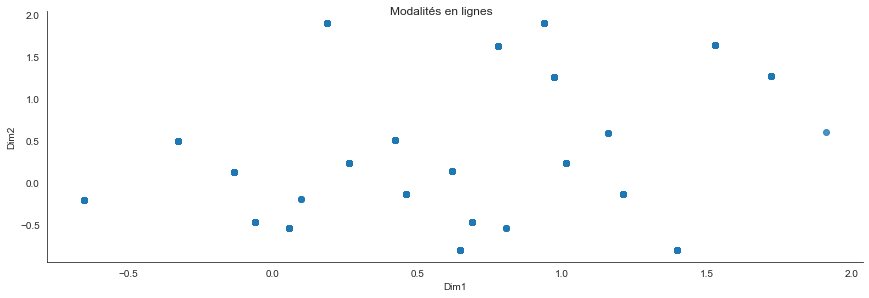

In [7]:
g_ind = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_ind, fit_reg = False, 
                       height = 4, aspect = 3)
g_ind.fig.suptitle("Modalités en lignes")
plt.show()

## Représentation des variables

In [8]:
df_var = pandas.DataFrame(mca.column_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_var

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10
Class_1st,1.151941,-1.231418,-0.890008,-0.049533,1.460940,-0.005902,0.051305,0.077772,-0.013464,0.07928
Class_2nd,0.651259,0.252522,2.392076,-0.505359,0.454055,-0.226544,0.051305,0.077772,-0.013464,0.07928
Class_3rd,0.130599,1.070050,-0.659068,-0.580899,-0.307933,-0.298099,0.051305,0.077772,-0.013464,0.07928
Class_Crew,-0.736941,-0.482727,0.082275,0.644339,-0.437074,0.312928,0.051305,0.077772,-0.013464,0.07928
Sex_Female,1.574794,0.008927,-0.009280,-0.338706,-0.501996,0.914393,0.051305,0.077772,-0.013464,0.07928
Sex_Male,-0.427587,-0.002424,0.002520,0.091965,0.136302,-0.248275,0.051305,0.077772,-0.013464,0.07928
Age_Adult,-0.067828,-0.153321,-0.001242,-0.141832,-0.059028,-0.019826,0.051305,0.077772,-0.013464,0.07928
Age_Child,1.301802,2.942646,0.023828,2.722128,1.132903,0.380510,0.051305,0.077772,-0.013464,0.07928
Survived_No,-0.509477,0.190238,-0.003751,-0.212137,0.248761,0.272994,0.051305,0.077772,-0.013464,0.07928
Survived_Yes,1.067680,-0.398669,0.007861,0.444562,-0.521314,-0.572097,0.051305,0.077772,-0.013464,0.07928


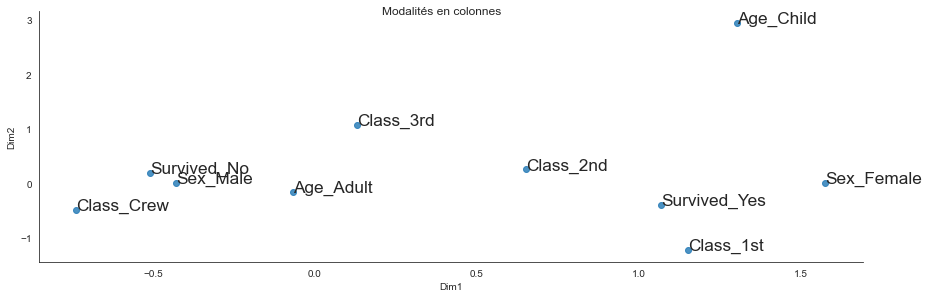

In [9]:
g_var = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_var, fit_reg = False, 
                       height = 4, aspect = 3)
g_var.fig.suptitle("Modalités en colonnes")
for i in df_var.index:
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size = "xx-large")
plt.show()

## Représentation simultanée

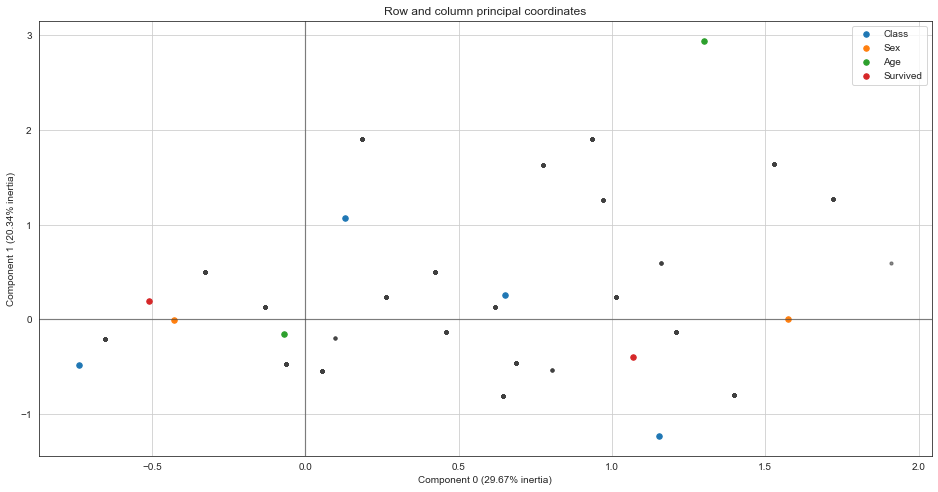

In [10]:
mca.plot_coordinates(df, figsize=(16, 8))
plt.show()

<Figure size 1152x576 with 0 Axes>

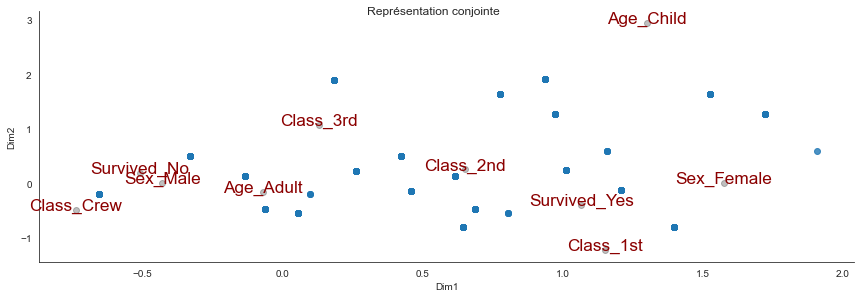

In [11]:
fig = plt.figure(figsize = (16,8))
g_simult = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_ind, fit_reg = False, 
                          height = 4, aspect = 3)

for i in df_var.index:
    plt.scatter(df_var.loc[i].Dim1, df_var.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size = "xx-large", color = "darkred", ha = "center")

g_simult.fig.suptitle("Représentation conjointe")
plt.show()